In [1]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
  

In [2]:
import urllib.request
import zipfile
import os

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/1qQo3T5lgUBLIOKeLLO37dlKtSDHpMMjw/view?usp=sharing'

In [6]:
id = link.split('d/')[1].split('/view?')[0]
print (id)

1qQo3T5lgUBLIOKeLLO37dlKtSDHpMMjw


In [7]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Dataset Bangkit.zip')

In [8]:
file_zip = 'Dataset Bangkit.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./Dataset/')
zip_ref.close()

print(os.listdir('./Dataset/'))

['Leaf Spot', 'Rust Leaf', 'Powdery Mildew']


In [9]:
TRAINING_DIR = os.path.join('/content/Dataset')

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range=20,
                                       zoom_range=0.2,
                                       shear_range=0.2,
                                       fill_mode='nearest',
                                       validation_split=0.2)

In [12]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                        subset='training')

Found 2389 images belonging to 3 classes.


In [13]:
validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 597 images belonging to 3 classes.


In [14]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.5),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
        ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.4857 - loss: 0.9613 - val_accuracy: 0.5745 - val_loss: 0.9451
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.6276 - loss: 0.8297 - val_accuracy: 0.5729 - val_loss: 0.9200
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - accuracy: 0.6911 - loss: 0.8159 - val_accuracy: 0.6449 - val_loss: 0.9018
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 25s 324ms/step - accuracy: 0.7216 - loss: 0.7847 - val_accuracy: 0.6817 - val_loss: 0.8915
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 299ms/step - accuracy: 0.7641 - loss: 0.7448 - val_accuracy: 0.6817 - val_loss: 0.8783
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - accuracy: 0.8122 - loss: 0.6889 - val_accuracy: 0.6985 - val_loss: 0.8645
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 278ms/step - accuracy: 0.7966 - loss: 0.6881 - val_accuracy: 0.7052 - val_loss: 0.8488
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 252ms/step - accuracy: 0.8124 - loss: 0.6278 - val_accuracy: 0.696

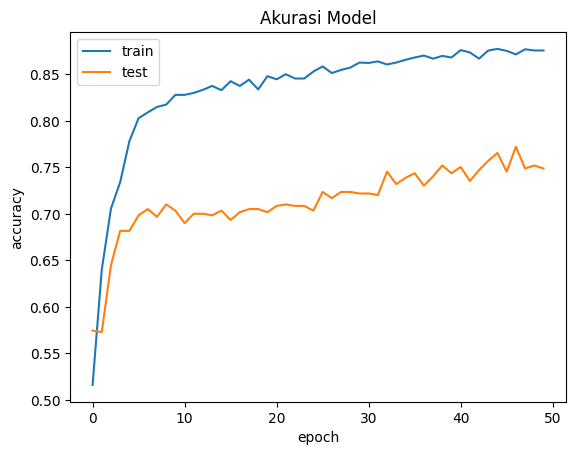

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

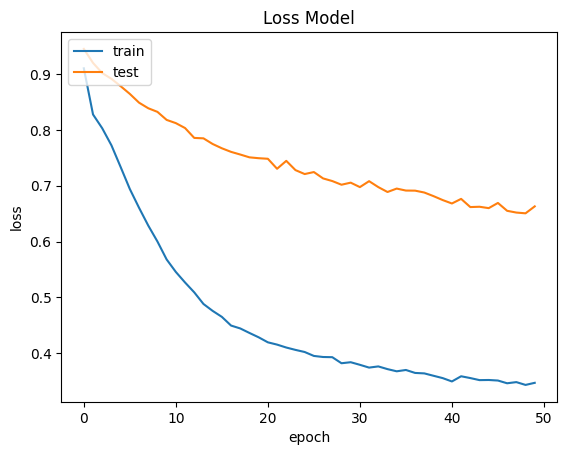

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
print(train_generator.class_indices)

{'Leaf Spot': 0, 'Powdery Mildew': 1, 'Rust Leaf': 2}


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Upload images
uploaded = files.upload()

# Class labels based on the provided indices
class_labels = {0: 'Leaf Spot', 1: 'Powdery Mildew', 2: 'Rust Leaf'}

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Display the image
    imgplot = plt.imshow(img)
    plt.show()

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Predict the class
    classes = model.predict(images, batch_size=10)
    print(fn)

    # Get the index of the highest probability class
    predicted_class_index = np.argmax(classes[0])

    # Get the corresponding class label
    predicted_class_label = class_labels.get(predicted_class_index, "Unknown")

    # Print the predicted class
    print(predicted_class_label)


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Upload images
uploaded = files.upload()

# Class labels based on the provided indices
class_labels = {0: 'Leaf Spot', 1: 'Powdery Mildew', 2: 'Rust Leaf'}

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Display the image
    imgplot = plt.imshow(img)
    plt.show()

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Predict the class
    classes = model.predict(images, batch_size=10)
    print(fn)

    # Get the index of the highest probability class
    predicted_class_index = np.argmax(classes[0])

    # Get the corresponding class label
    predicted_class_label = class_labels.get(predicted_class_index, "Unknown")

    # Print the predicted class
    print(predicted_class_label)


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Upload images
uploaded = files.upload()

# Class labels based on the provided indices
class_labels = {0: 'Leaf Spot', 1: 'Powdery Mildew', 2: 'Rust Leaf'}

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Display the image
    imgplot = plt.imshow(img)
    plt.show()

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Predict the class
    classes = model.predict(images, batch_size=10)
    print(fn)

    # Get the index of the highest probability class
    predicted_class_index = np.argmax(classes[0])

    # Get the corresponding class label
    predicted_class_label = class_labels.get(predicted_class_index, "Unknown")

    # Print the predicted class
    print(predicted_class_label)


In [20]:
model.save('model.h5')

In [21]:
model.save('model.keras')

In [22]:
import tensorflowjs as tfjs

In [23]:
tfjs.converters.save_keras_model(model, '/content/tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!tensorflowjs_converter --input_format=keras /content/model.h5 /content/tfjs_model_2

2024-06-04 05:57:00.109320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
# Save the model in TensorFlow.js format
tfjs.converters.save_keras_model(model, '/content/my_tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


In [26]:
!zip -r my_tfjs_model.zip /content/tfjs_model

  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/group1-shard11of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard15of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard2of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard8of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard9of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard17of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard14of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard12of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard13of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard19of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard3of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard6of19.bin (deflated 8%)
  adding: content/tfjs_model/model.json (deflated 83%)
  adding: content/tfjs_model/group1-shard16of19.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard1of19.bin